# 12.5 Capítulo 12

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.cluster import hierarchy

%matplotlib inline

## 12.5.1 Análise de componentes principais

Vamos usar os dados `USArrests`, que contêm os 50 estados americanos nas linhas, e, nas colunas, tipos de crimes (cada entrada corresponde ao número de crimes por 100.000 habitantes), além da população urbana de cada estado.

In [2]:
USArrests = pd.read_csv('../data/USArrests.csv', index_col=0)

In [3]:
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Em primeiro lugar, note que a proporção de cada crime (como fração da população) varia muito.

In [4]:
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Isso sugere que colocar as variáveis numa mesma escala é fundamental para rodar PCA, do contrário os resultados serão indevidamente influenciados pela escala. Ou seja, como assaltos são muito mais frequentes que assassinatos, na hora de encontrar as direções das features que minimizam a variância vamos acabar priorizando assaltos. Para evitar que isso aconteça, vamos usar `StandardScaler()`, que subtrai a média de cada coluna e divide as entradas pelo desvio-padrão. Assim, toda coluna tem média zero e variância um.

In [5]:
X = pd.DataFrame(StandardScaler().fit_transform(USArrests), index=USArrests.index, columns=USArrests.columns)
X.shape

(50, 4)

Aqui, $n=50$ e $p=4$. Os componentes principais são dados por $Z = \tilde{X}W$, onde $W \in \mathbb{R}^{p \times p}$ são os loadings.

In [6]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=USArrests.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


E podemos checar que os valores acima são exatamente os autovetores de $X^T X$:

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(X.T @ X)
eigenvectors

array([[ 0.53589947,  0.41818087,  0.6492278 , -0.34123273],
       [ 0.58318363,  0.1879856 , -0.74340748, -0.26814843],
       [ 0.27819087, -0.87280619,  0.13387773, -0.37801579],
       [ 0.54343209, -0.16731864,  0.08902432,  0.81777791]])

Note que alguns valores da tabela acima aparecem diferente no livro: o sinal pode mudar porque é possível alterar se mudarmos o sinal dos loadings e dos PCs, o resultado final não é afetado. Fora isso, as entradas acima são bem-especificadas.

Agora, vamos obter os quatro primeiros componentes principais de `X` (ou seja, $z_i = \tilde{X}w_i$ para $i=1, 2, 3, 4$).

In [8]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


E novamente podemos checar que esses valores são apenas a projeção de $X$ na base de autovetores:

In [9]:
(X @ eigenvectors).tail()

,0,1,2,3
Virginia,-0.096335,0.199735,0.211371,0.011713
Washington,-0.216903,-0.970124,-0.220848,0.624871
West Virginia,-2.108585,1.424847,0.131909,0.104775
Wisconsin,-2.079714,-0.611269,0.184104,-0.138865
Wyoming,-0.629427,0.321013,-0.166652,-0.240659


Apesar de termos recuperado uma matriz $Z=X W \in \mathbb{R}^{50 \times 4}$ com o mesmos tamanho da matriz original, as colunas agora têm um significado próprio: elas são as projeções da matriz original nas direções que maximizam a variância dos dados (isto é, dos loadings). Com isso, as primeiras colunas costumam carregar informações mais relevantes que as últimas para resumir a matrix. Daí, segue-se que uma das vantagens de PCA é visualizar os dados em usando poucas dimensões, como duas. Isso é feito projetando as entradas nos dois primeiros componentes (resultando no chamado biplot).

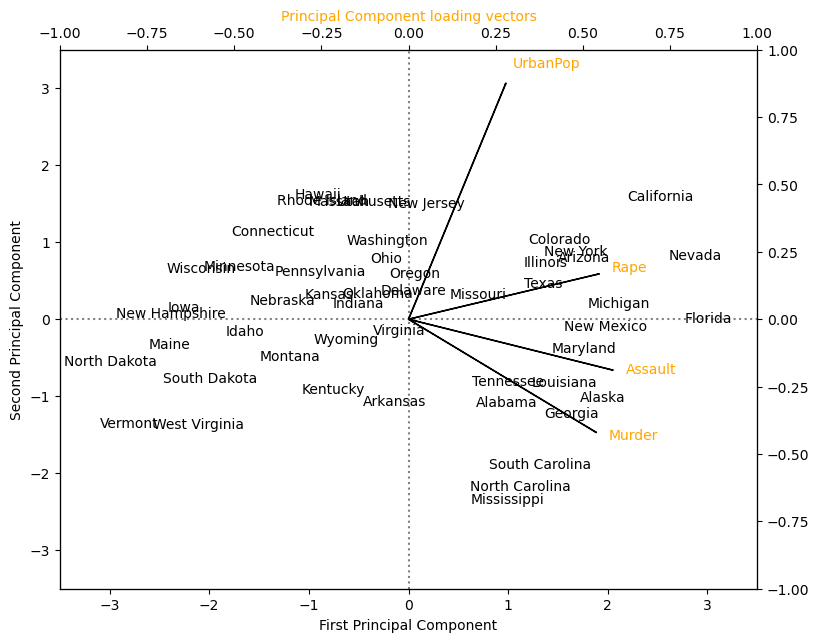

In [10]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1.iloc[0], -pca_loadings.V2.iloc[0])
ax2.arrow(0,0,pca_loadings.V1.iloc[1], -pca_loadings.V2.iloc[1])
ax2.arrow(0,0,pca_loadings.V1.iloc[2], -pca_loadings.V2.iloc[2])
ax2.arrow(0,0,pca_loadings.V1.iloc[3], -pca_loadings.V2.iloc[3])
plt.show()

A posição dos estados corresponde aos scores dos dois primeiros componentes (e.g., California: (2.523980, -1.542934; estamos usando o negativo da segunda entrada para igualar à figura do livro). As linhas indicam os loadings dos dois primeiros componentes principais. Pelo biplot, podemos ver que o primeiro componente principal captura a noção de criminalidade (e.g., estados com primeira componente principal grande correspondem a estados com mais crimes) e o segundo componente principal captura a noção de urbanização.

Para decidir quantos PCs são suficientes para capturar os dados apropriadamente, podemos olhar para a variância explicada por um certo número de PCs. Isso é uma alternativa ao que fizemos com PCR, que foi usar a performance preditiva de um modelo baseado em PCs para decidir.

In [11]:
print(f"Variância explicada por cada PC: {pca.explained_variance_}")
print(f"Proporção de variância explicada por cada PC: {pca.explained_variance_ratio_}")

Variância explicada por cada PC: [2.53085875 1.00996444 0.36383998 0.17696948]
Proporção de variância explicada por cada PC: [0.62006039 0.24744129 0.0891408  0.04335752]


Como vimos, a variância explicada é apenas uma normalização dos autovalores:

In [12]:
eigenvalues/eigenvalues.sum()

array([0.62006039, 0.24744129, 0.04335752, 0.0891408 ])

Para ajudar a decidir quantos PCs usar, podemos simplesmente plotar os valores acima e procurar algum momento me que a variância explicada adicional é negligente.

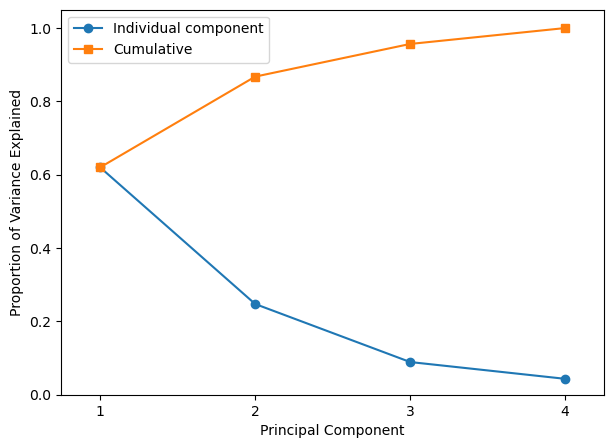

In [13]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)
plt.show()

Por exemplo, se queremos garantir ao menos 80% da variância sendo explicada pelos PCs, precisamos incluir 2 PCs.

## 12.5.2 Completamento de matrizes

A técnica essencial para encontrar aproximações de baixo posto para matrizes é a decomposição SVD.

In [14]:
U, D, Vt = svd(X, full_matrices=False)
U.shape, D.shape, Vt.shape

((50, 4), (4,), (4, 4))

De fato, podemos sempre escrever $X=UDV^T$, mas as matrizes ortogonais $U$ e $V$, e a matriz diagonal $D$ carregam bastante informação acerca de aproximações de $X$. 

In [15]:
np.allclose(X, np.dot(U * D, Vt))

True

Como discutimos, a matriz $V^T$ é equivalente à matriz de componentes principais (exceto pelo sinal que, como argumentamos antes, não é bem-definido).

In [16]:
print(Vt)
print ('-------')
print(pca.components_)


[[-0.53589947 -0.58318363 -0.27819087 -0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [ 0.34123273  0.26814843  0.37801579 -0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]
-------
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


A vantagem de usar SVD para encontrar boas aproximações de baixo posto é que, especificado qual é o posto máximo, basta restringir $U$ a ter esse número de colunas, $D$ a ser uma matriz diagonal com essas linhas, e $V^T$ a ser uma matriz com esse número de linhas. Por exemplo, qual é a melhor aproximação de posto 3 para $X$?

In [17]:
num_components = 3
recovered = pd.DataFrame(U[:, :num_components] @ np.diag(D[:num_components,]) @ Vt[:num_components,:])

In [18]:
print(f"Rank of the matrix is: {np.linalg.matrix_rank(recovered)}")

Rank of the matrix is: 3


In [19]:
print(recovered.head(n=2))

          0         1         2         3
0  1.153726  0.906957 -0.547116 -0.017363
1  0.797759  0.792013 -1.165350  2.548469


In [20]:
print(X.head(n=2))

           Murder   Assault  UrbanPop      Rape
Alabama  1.255179  0.790787 -0.526195 -0.003451
Alaska   0.513019  1.118060 -1.224067  2.509424


Podemos usar o Algoritmo 12.1, de completamento de matrizes, para lidar com dados faltantes. Para isso, vamos introduzir 20 entradas faltantes nas 200 entradas da matriz `X`

In [21]:
X.shape

(50, 4)

In [22]:
np.random.seed(1)
na_rows = np.random.choice(X.shape[0], 20, replace=False)
na_cols = np.random.choice(X.shape[1], 20)

X_na = X.copy()

for element in zip(na_rows, na_cols):
    X_na.iloc[element] = np.nan

In [23]:
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [24]:
X_na.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,NaN,1.009122,1.053466
Arkansas,0.234708,NaN,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


Será útil guardar os índices dos elementos faltantes. Vamos fazer isso com as matrizes `is_missing` e sua negação, `is_observed`.

In [25]:
is_missing = X_na.isna()
is_observed = ~is_missing

Para implementar o algoritmo de imputação, criamos primeiro uma função auxiliar que retorna a matrix aproximada (via SVD) com posto $M$.

In [26]:
def fit_SVD(X, M=1):
    U, D, Vt = svd(X, full_matrices=False)
    return pd.DataFrame(U[:, :M] @ np.diag(D[:M]) @ Vt[:M, :], index = X.index, columns = X.columns)

Começamos com uma imputação usando a média de cada coluna para obter um primeiro estimador `X_hat`, e medimos os nossos erros iniciais. A partir daí, iterativamente, fitamos um SVD no nosso estimador atual `X_hat`, e usamos os valores obtidos na aproximação no lugar das entradas originalmente faltantes em `X_hat`. Daí, observamos o erro relativo até ele cair abaixo de um certo valor.

In [27]:
threshold = 1e-7
relative_error = 1
i = 0

X_colmeans = X_na.fillna(X_na.mean())

X_hat = X_na.fillna(10) # X_colmeans.copy()
mean_observed_elements = (X_na[is_observed]**2).mean(1).mean(0)
# columns_means = pd.DataFrame(data = [X_na.mean()], index = X_na.index)
# error_old = ((X_hat[is_observed] - columns_means[is_observed])**2).mean(1).mean(0)
error_old = np.inf

while relative_error > threshold:
    i = i+1
    X_approx = fit_SVD(X_hat)
    X_hat[is_missing] = X_approx[is_missing]
    error = ((X_na[is_observed] - X_approx[is_observed])**2).mean(1).mean(0)
    relative_error = (error_old - error)/mean_observed_elements
    error_old = error
    print(f"Iter: {i}; Error: {error}; Rel Error: {relative_error}")

Iter: 1; Error: 2.7498626801136203; Rel Error: inf
Iter: 2; Error: 0.6828351265384985; Rel Error: 2.0975828523417643
Iter: 3; Error: 0.5085273796788612; Rel Error: 0.17688440592420795
Iter: 4; Error: 0.43386268269874584; Rel Error: 0.07576840850036208
Iter: 5; Error: 0.3891548506192754; Rel Error: 0.04536871401306362
Iter: 6; Error: 0.374334953997877; Rel Error: 0.01503896789994737
Iter: 7; Error: 0.3710497643327554; Rel Error: 0.0033337521293951124
Iter: 8; Error: 0.37042502746368156; Rel Error: 0.0006339718798273471
Iter: 9; Error: 0.3703052192675436; Rel Error: 0.00012157922972738197
Iter: 10; Error: 0.3702792179971251; Rel Error: 2.6385627455547954e-05
Iter: 11; Error: 0.37027220650751125; Rel Error: 7.115135140771626e-06
Iter: 12; Error: 0.3702698041356768; Rel Error: 2.4378842730983295e-06
Iter: 13; Error: 0.37026882499608804; Rel Error: 9.936134657909546e-07
Iter: 14; Error: 0.3702683883218111; Rel Error: 4.431293012161846e-07
Iter: 15; Error: 0.3702681861711611; Rel Error: 2.05

Depois de algumas iterações, o algoritmo converge, e obtemos nossas estimativas para os valores faltantes. A correlação entre os valores imputados e os valores reais é relativamente alta: 60%.

In [28]:
x_hat = X_hat[is_missing].to_numpy().flatten()
x_hat = x_hat[~np.isnan(x_hat)]

x = X[is_missing].to_numpy().flatten()
x = x[~np.isnan(x)]

np.corrcoef(x,x_hat)[0,1]

0.6116356302257182

A correlação entre os valores observados e as médias de cada coluna é bem pior, e negativa!

In [29]:
x_colmeans = X_colmeans[is_missing].to_numpy().flatten()
x_colmeans = x_colmeans[~np.isnan(x_colmeans)]
np.corrcoef(x, x_colmeans)[0, 1]

-0.21182375868657816

Finalmente, podemos medir também o erro médio quadrático do nosso estimador, `X_hat`, e do uso das médias das colunas, `column_means`.

In [30]:
print(f"MSE of X_hat: {np.mean((x-x_hat)**2)}")
print(f"MSE of column_means: {np.mean((x-x_colmeans)**2)}")

MSE of X_hat: 0.6205307381467221
MSE of column_means: 1.0095363811231823


## 12.5.3 Clusterização

Nesta subseção, vamos implementar diferentes tipos de clusterização.

### Clusterização K-means

Vamos simular dados e entender como $k$-means funciona para classificá-los.

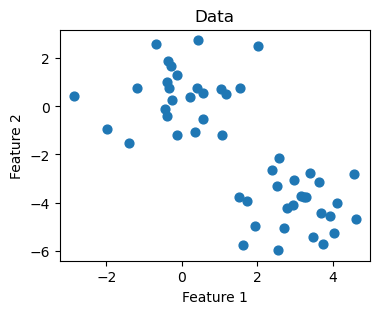

In [31]:
np.random.seed(21)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(X[:,0], X[:,1], s=40) 
ax.set_title('Data')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Ao que tudo indica, temos dois clusters claros nos dados. O que acontece se rodarmos $k$-means com $k=2$ e depois $k=3$?

In [32]:
n_clusters = 2
km_2 = KMeans(n_clusters=n_clusters, n_init=20)
km_2.fit(X)

n_clusters = 3
km_3 = KMeans(n_clusters=n_clusters, n_init=20)
km_3.fit(X)

KMeans(n_clusters=3, n_init=20)

Existem várias propriedades dentro dos objetos `km_2` e `km_3`. Como sempre, podemos examiná-las via `dir(km_2)`, por exemplo. Com isso, é fácil descobrir que podemos recuperar o cluster associado a cada entrada via `km_2.labels_`

In [33]:
print(km_2.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Vamos colocar num gráfico o resultado da clusterização com $k=2$ e $k=3$ para entender como o algoritmo repartiu os dados.

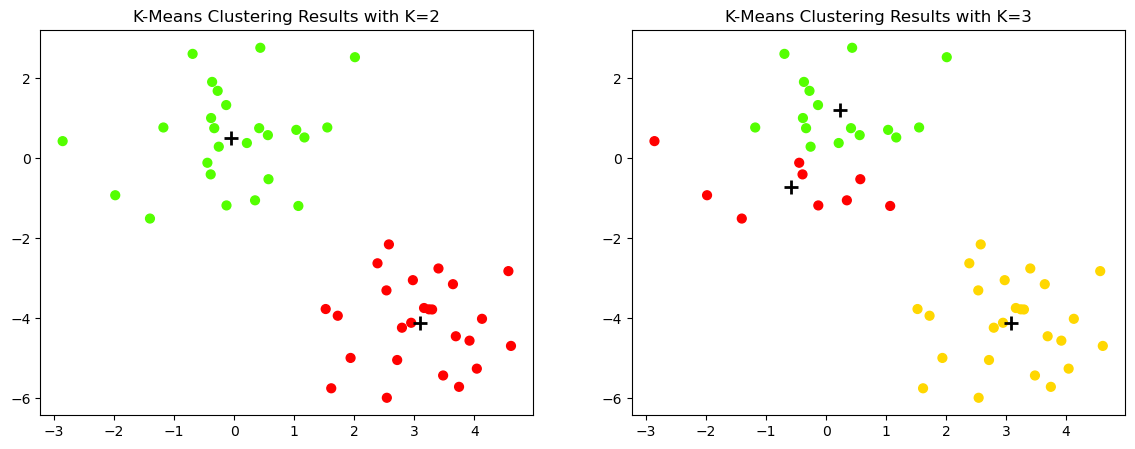

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km_2.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km_3.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
plt.show()

Ou seja, o cluster em vermelho continuou igual, mas o algoritmo entendeu que a variabilidade no cluster verde era grande o suficiente para se beneficiar de um cluster amarelo adicional. Note que o centróide do antigo cluster verde se ajustou à presença do novo cluster.

### Clustering hierárquico

Para esses mesmos dados, vamos olhar para uma clusterização hierárquica usando complete linkage, average linkage e single linkage. Abaixo, ilustramos o dendrograma resultante.

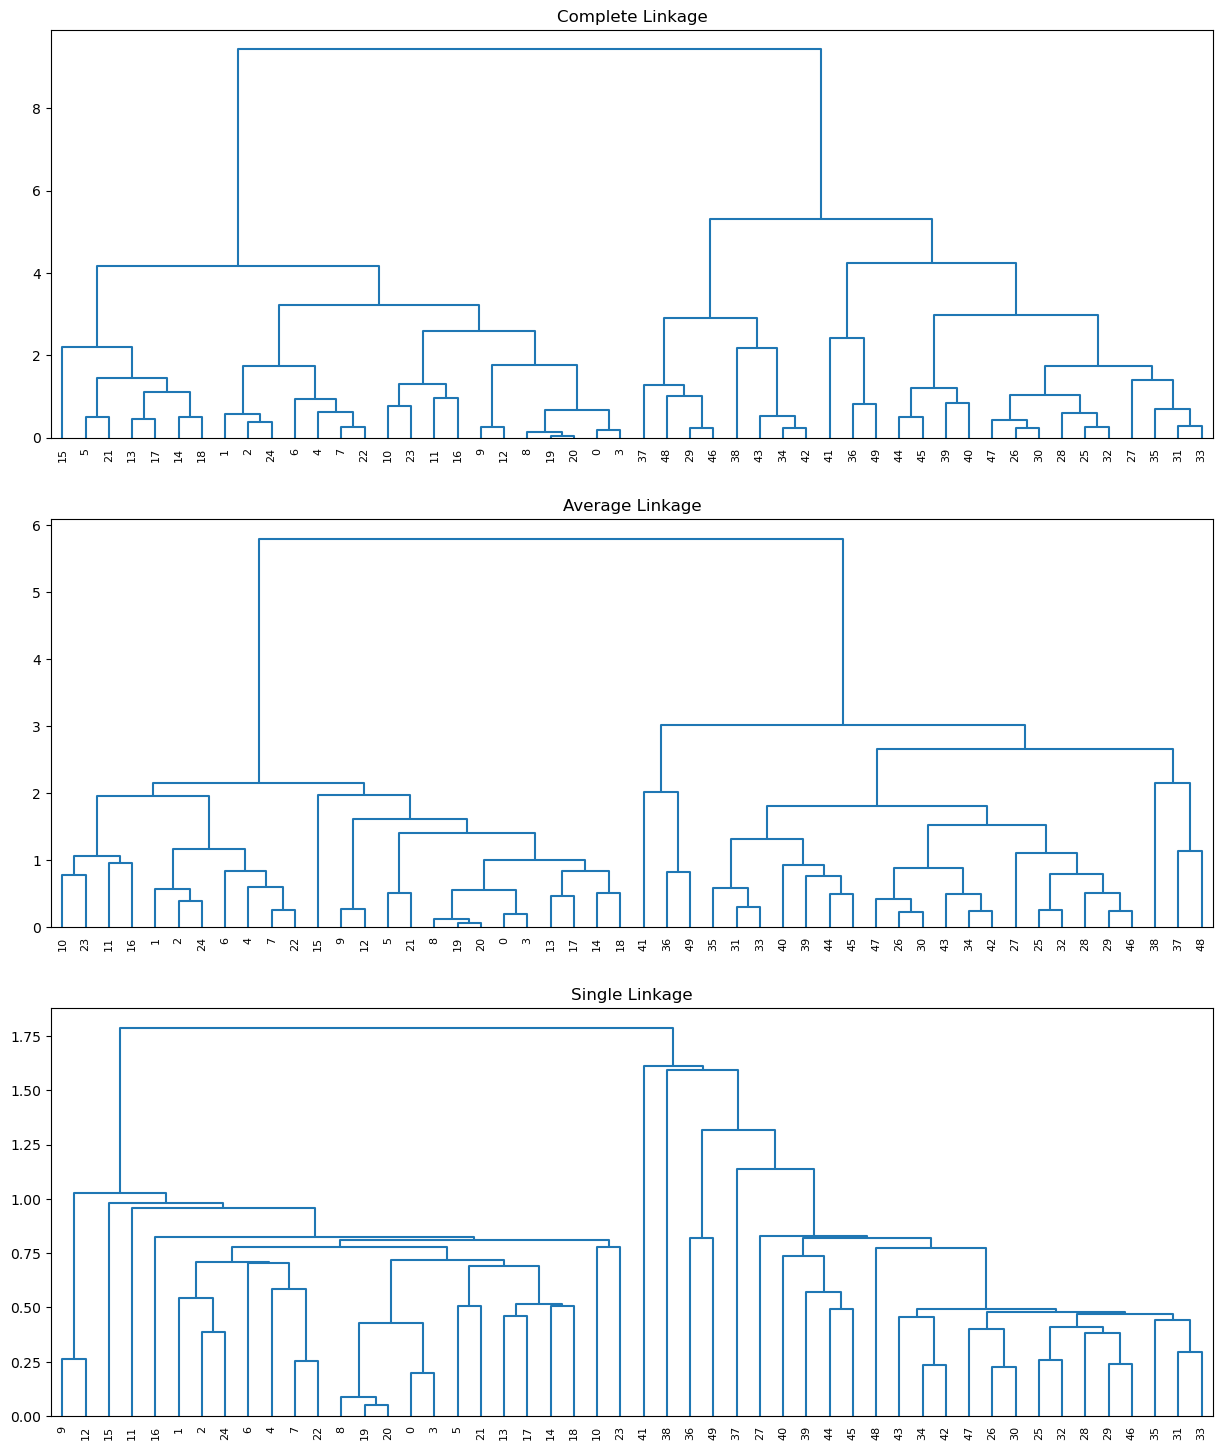

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
plt.show()

Tanto complete quanto average clustering parecem sugerir que usar dois clusters é razoável para esses dados. Já single linkage é mais cheio de fios, como foi comentado no texto.

Também podemos colorir os clusters que existem a uma certa altura, digamos 4.5, para facilitar a visualização (e a contagem do número de clusters resultantes).

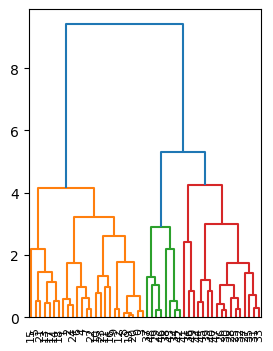

In [36]:
fig, ax = plt.subplots(figsize=(3,4))
cluster = hierarchy.dendrogram(hierarchy.complete(X), ax=ax, color_threshold=5)
plt.show()

Também podemos visualizar o cluster resultante desse corte. Não é tão diferente de $k$-means.

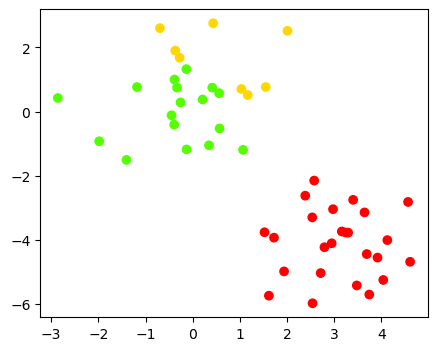

In [37]:
plt.figure(figsize=(5, 4))
plt.scatter(X[:,0], X[:,1], c=hierarchy.fcluster(hierarchy.linkage(X, 'complete'), 5, 'distance'), cmap='prism')
plt.show()

## 12.5.4 Exemplo com dados reais: dataset NCI60

Vamos olhar para o dataset `NCI60`. Aqui temos $p=6830$ marcadores genéticos para $n=64$ células tumorais. Nosso interesse é ver se esses tumores podem ser agrupados de alguma maneira que caracterize o tipo de câncer de cada uma. Ou seja, gostaríamos de clusterizar os dados de tal maneira que os melanomas fiquem agrupados juntos, os tumores de mama renais, etc.

In [38]:
X = pd.read_csv('../data/NCI60-data.csv', index_col=0)
y = pd.read_csv('../data/NCI60-labs.csv', index_col=0)

Começamos colocando os dados na mesma escala.

In [39]:
pca2 = PCA()
X_standardized = StandardScaler().fit_transform(X)
df2_plot = pd.DataFrame(pca2.fit_transform(X_standardized))

Vamos olhar para a projeção dos dados em algumas componentes principais, e ver se com isso conseguimos distinguir os tipos de tumores.

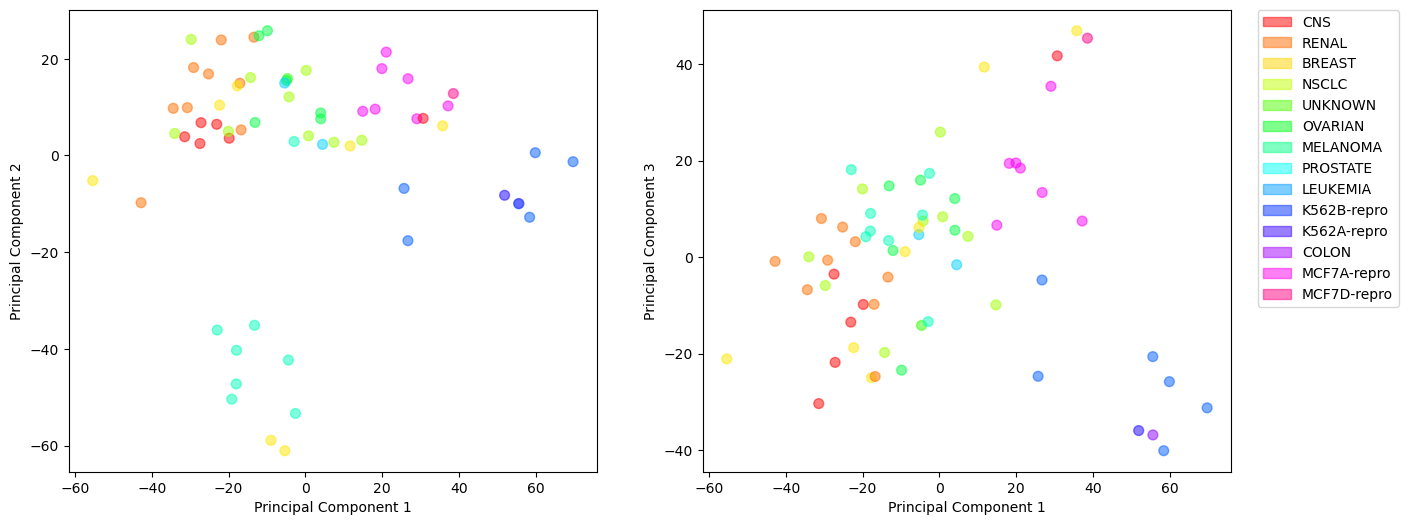

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.iloc[:, 0])[0]
cmap = plt.cm.hsv

ax1.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

handles = []
labels = pd.factorize(y.iloc[:, 0].unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')   

Os componentes principais parecem ser relativamente bem-sucedidos em caracterizar os tipos de tumores. Isso quer dizer que tumores parecidos de fato devem ter expressões genéticas similares. Uma maneira de quantificar essa intuição é através da proporção de variância explicada.

In [41]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).array,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


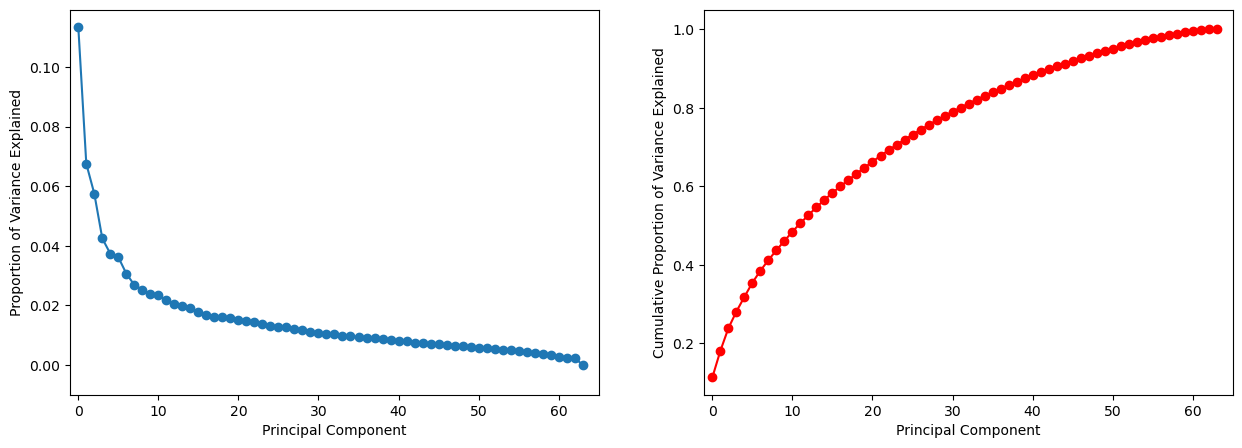

In [42]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65) 

Parece haver uma queda mais aguda na proporção de variância explicada mais ou menos no sétimo PC, então talvez faça sentido concentrar nossa análise nesses primeiros componentes.

Alternativamente, podemos clusterizar nossas observações em grupos distintos. Vamos ver como os diferentes tipos de clusters hierárquicos se saem nesse dataset.

In [43]:
sc = StandardScaler()
X_standardized = pd.DataFrame(sc.fit_transform(X), index=y.iloc[:, 0], columns=X.columns)

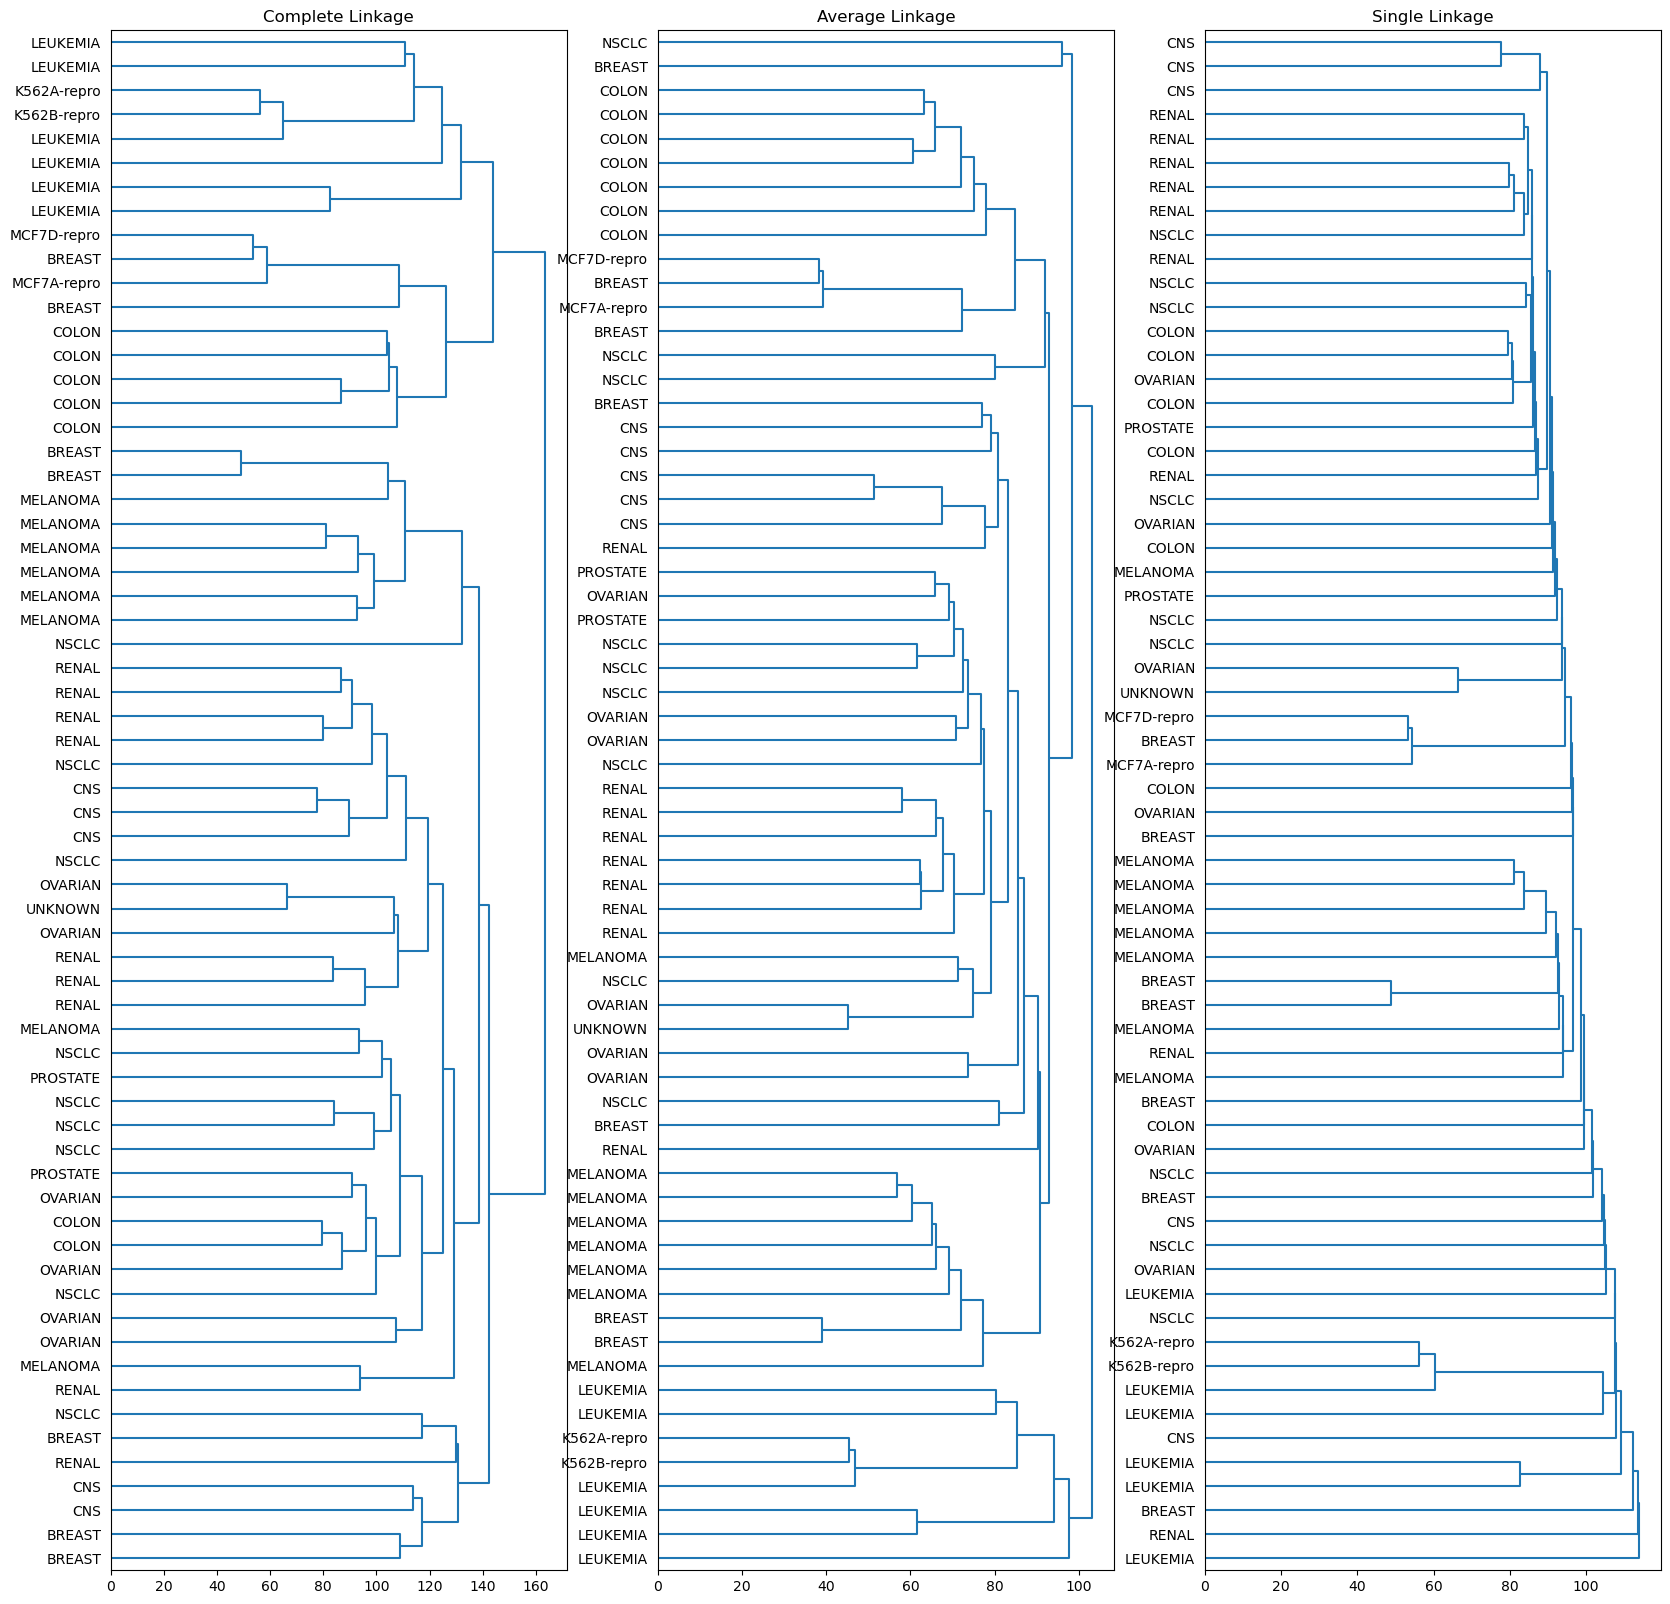

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X_standardized), hierarchy.average(X), hierarchy.single(X_standardized)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=X_standardized.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
plt.show()

Como antes, clustering com single linkage traz mais clusters desbalanceados, mas complete e average linkage trazem resultados relativamente equilibrados, e de tal modo que cânceres parecidos aparecem juntos. Por esse motivo, vamos focar em usar complete linkage.

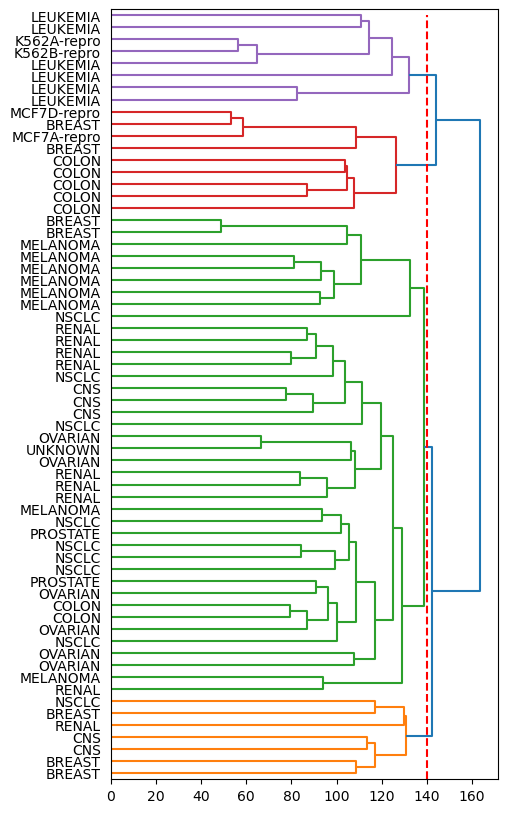

In [45]:
plt.figure(figsize=(5,10))
cut4 = hierarchy.dendrogram(hierarchy.complete(X_standardized),
                            labels=X_standardized.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed')
plt.show()

Fazendo um corte na altura 140, obtemos quatro clusters que parecem bem-sucedidos em discriminar cada tipo de câncer (mesmo que não seja perfeito; e.g., câncer renal aparece no cluster amarelo e no verde).

Mencionamos antes que clustering hierárquico e $k$-means, mesmo quando resultando no mesmo número de clusters, podem dar resultados bem diferentes. Vamos ver como $k$-means se sai nesses dados.

Como o algoritmo é aleatório, em primeiro lugar especificamos um seed.

In [46]:
np.random.seed(0)
km3 = KMeans(n_clusters=4, n_init=50)
km3.fit(X_standardized)

KMeans(n_clusters=4, n_init=50)

Agora, vamos comparar $k$-means e clustering hierárquico contando quantas vezes pontos com certa categoria em $k$-means caíram em outra categoria no clustering hierárquico.

In [47]:
km_labels = km3.labels_+1
hc_labels = hierarchy.fcluster(hierarchy.complete(X_standardized), 140,'distance')
confusion_matrix(km_labels, hc_labels)

array([[ 0, 13,  9,  1],
       [ 7, 18,  0,  0],
       [ 0,  0,  0,  7],
       [ 0,  9,  0,  0]])

As atribuições não são as mesmas, mas há certa concordância.

Por último, ao invés de fazermos clustering na matriz completa, podemos primeiro fazer PCA e aí fazer o clustering nos PCs. Às vezes, isso funciona bem porque retira ruído dos dados. Primeiro, vamos investigar o dendrograma com os dados originais.

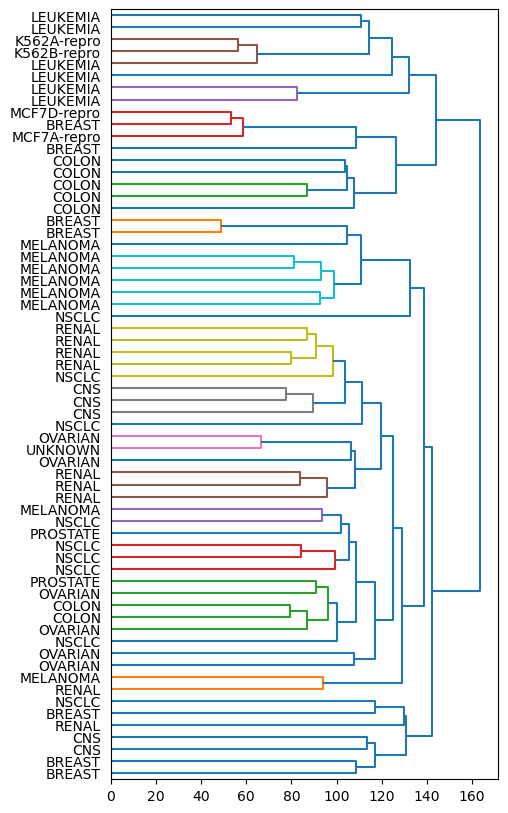

In [48]:
plt.figure(figsize=(5,10))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(X_standardized), labels=X_standardized.index,
orientation='right', color_threshold=100, leaf_font_size=10)

Agora, o dendrograma com os cinco primeiros PCs clusterizados.

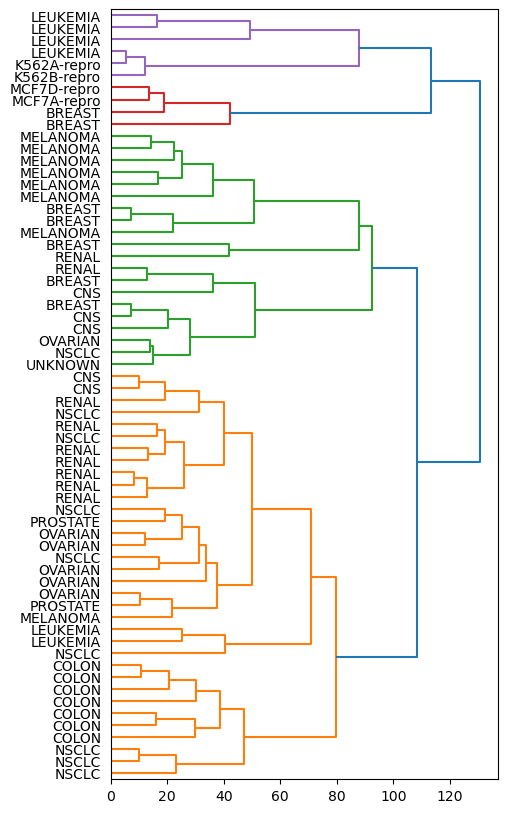

In [49]:
plt.figure(figsize=(5,10))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), labels=X_standardized.index,
orientation='right', color_threshold=100, leaf_font_size=10)

Nesse caso, não é claro se estamos melhor usando os PCs --- em particular porque, como os dados não são supervisionados, não é trivial medir uma taxa de sucesso.